In [1]:
from rennpa import *

In [2]:
raw_csv = "input.csv"

In [3]:
#shuffle_data(input=raw_csv, output="input.csv")

In [4]:
cube = dict(
    collection="S2-16D-2",
    start_date="2023-01-01",
    end_date="2023-12-31",
    freq='16D',
    bands=["B02", "B03", "B04", "B08", "NDVI", "EVI", "NBR"]
)

In [5]:
#ts = rennpa_get_timeseries(cube, input="input.csv",output="timeseries.json")

In [6]:
ts = rennpa_open_ts_json(input="timeseries.json")

In [7]:
indicies = dict(
    OSAVI = rennpa_create_indicies(formula="OSAVI", bands=dict(NIR="B08", RED="B04"), timeseries=ts),
    NDWI =  rennpa_create_indicies(formula="NDWI", bands=dict(NIR="B08", GREEN="B03"), timeseries=ts),
    RECI = rennpa_create_indicies(formula="RECI", bands=dict(NIR="B08", RED="B04"), timeseries=ts)
)

In [8]:
df = rennpa_dataframe(timeseries=ts, input_csv="input.csv", indicies=indicies)

In [9]:
labels = {319: 0, 320: 1, 321: 2, 323: 3, 324: 4, 325: 5, 326: 6, 327: 7, 328: 8}

In [10]:
df['label'] = [labels[x] for x in df['label'].to_numpy()]

In [11]:
df.head()

,B02,B03,B04,B08,NDVI,OSAVI,NDWI,RECI,label
0,"[365, 5527, 808, 572, 453, 443, 1554, 360, 371...","[387, 5054, 943, 767, 652, 597, 1527, 588, 560...","[370, 4459, 855, 731, 630, 611, 1324, 531, 551...","[848, 5211, 2773, 2340, 2208, 2104, 3193, 2025...","[4762, 733, 5601, 5576, 5899, 5764, 4413, 6150...","[0.392395087673212, 0.07776500078592288, 0.528...","[-0.37327935222672065, -0.015294690696541647, ...","[2.2857142857142856, 1.1683856502242151, 3.239...",2
1,"[558, 1763, 4753, 908, 1095, 474, 493, 507, 51...","[1002, 2080, 4385, 881, 1347, 777, 753, 734, 7...","[688, 1892, 4031, 571, 1058, 672, 679, 787, 84...","[4092, 4316, 5218, 2793, 3752, 3084, 2952, 280...","[7354, 4168, 1424, 6659, 5889, 6680, 6528, 584...","[0.71211005489356, 0.39045385428210616, 0.1283...","[-0.6065959952885748, -0.34959349593495936, -0...","[5.939042089985486, 2.2799788695192817, 1.2941...",1
2,"[493, 486, 439, 327, 608, 422, 326, 329, 460, ...","[902, 871, 763, 663, 766, 730, 664, 721, 752, ...","[864, 937, 799, 725, 691, 983, 594, 627, 959, ...","[3040, 2821, 2721, 2498, 2022, 2215, 2930, 284...","[5914, 5421, 5871, 5938, 5263, 4369, 6793, 654...","[0.5573542067948035, 0.5013091512868, 0.545997...","[-0.5423642820903095, -0.528169014084507, -0.5...","[3.514450867052023, 3.0074626865671643, 3.4012...",1
3,"[3618, 346, 352, 377, 478, 386, 414, 359, 392,...","[3446, 618, 655, 628, 702, 647, 638, 627, 636,...","[3185, 631, 562, 594, 650, 659, 634, 649, 709,...","[3688, 1925, 2223, 2141, 2209, 2162, 2102, 206...","[1016, 5417, 6370, 6002, 5871, 5663, 5764, 556...","[0.07318322285528055, 0.5062280921382073, 0.59...","[-0.03392206335856462, -0.5139598898938262, -0...","[1.157564344005022, 3.045886075949367, 3.94849...",2
4,"[1147, 271, 410, 425, 292, 313, 261, 316, 321,...","[1306, 502, 632, 650, 578, 706, 662, 681, 540,...","[1101, 339, 996, 981, 429, 499, 430, 824, 1008...","[3965, 2814, 1687, 2018, 2803, 3218, 3120, 247...","[5775, 8004, 3373, 4132, 7597, 7516, 7789, 552...","[0.5653196898637233, 0.7849268670159459, 0.257...","[-0.5044583570479985, -0.6972255729794934, -0....","[3.598003629764065, 8.276470588235295, 1.69207...",5


In [12]:
train, val = rennpa_split(df, 0.8)
      
train_ds = TimeseriesDataset(train)
val_ds = TimeseriesDataset(val)

In [13]:
input_size = 23
hidden_size = 8
num_layers = 3
output_size = 9

In [14]:
model = rennpa_lstm(input_size, hidden_size, num_layers, output_size)

In [15]:
criterion = rennpa_crossentropyloss()
optimizer = rennpa_adam(model.parameters(),lr=0.001)

In [16]:
model_trained = rennpa_train(train_ds, val_ds, model, 100, optimizer, criterion)

  1%|          | 1/100 [00:02<04:48,  2.92s/it]

Epoch 0, Loss: 1.905357232280806


  2%|▏         | 2/100 [00:06<05:00,  3.07s/it]

Epoch 1, Loss: 1.672812167335959


  3%|▎         | 3/100 [00:09<05:02,  3.12s/it]

Epoch 2, Loss: 1.605473577586654


  4%|▍         | 4/100 [00:12<04:52,  3.05s/it]

Epoch 3, Loss: 1.4726237557292763


  5%|▌         | 5/100 [00:15<04:55,  3.12s/it]

Epoch 4, Loss: 1.3797596529418348


  6%|▌         | 6/100 [00:18<04:47,  3.06s/it]

Epoch 5, Loss: 1.3102243266074487


  7%|▋         | 7/100 [00:21<04:45,  3.07s/it]

Epoch 6, Loss: 1.2557363291971044


  8%|▊         | 8/100 [00:24<04:38,  3.02s/it]

Epoch 7, Loss: 1.2015160361146615


  9%|▉         | 9/100 [00:27<04:36,  3.04s/it]

Epoch 8, Loss: 1.1588976196214265


 10%|█         | 10/100 [00:30<04:35,  3.06s/it]

Epoch 9, Loss: 1.123321498920715


 11%|█         | 11/100 [00:33<04:34,  3.09s/it]

Epoch 10, Loss: 1.1140294004889095


 12%|█▏        | 12/100 [00:36<04:31,  3.08s/it]

Epoch 11, Loss: 1.0924301887649337


 13%|█▎        | 13/100 [00:39<04:25,  3.05s/it]

Epoch 12, Loss: 1.085075293880662


 14%|█▍        | 14/100 [00:42<04:19,  3.02s/it]

Epoch 13, Loss: 1.0759520978709451


 15%|█▌        | 15/100 [00:45<04:17,  3.03s/it]

Epoch 14, Loss: 1.0667358177160127


 16%|█▌        | 16/100 [00:48<04:11,  2.99s/it]

Epoch 15, Loss: 1.0515733509281882


 17%|█▋        | 17/100 [00:51<04:11,  3.04s/it]

Epoch 16, Loss: 1.0459557444441552


 18%|█▊        | 18/100 [00:55<04:13,  3.10s/it]

Epoch 17, Loss: 1.0369303678375443


 19%|█▉        | 19/100 [00:58<04:07,  3.05s/it]

Epoch 18, Loss: 1.0228217018196006


 20%|██        | 20/100 [01:00<04:02,  3.03s/it]

Epoch 19, Loss: 1.0152337052463707


 21%|██        | 21/100 [01:03<03:58,  3.02s/it]

Epoch 20, Loss: 1.0086814441712073


 22%|██▏       | 22/100 [01:07<03:58,  3.06s/it]

Epoch 21, Loss: 1.0115910421789083


 23%|██▎       | 23/100 [01:10<04:03,  3.16s/it]

Epoch 22, Loss: 1.0075646557059943


 24%|██▍       | 24/100 [01:13<04:00,  3.17s/it]

Epoch 23, Loss: 1.004903441550685


 25%|██▌       | 25/100 [01:16<03:55,  3.14s/it]

Epoch 24, Loss: 0.9957995960135865


 26%|██▌       | 26/100 [01:19<03:51,  3.13s/it]

Epoch 25, Loss: 0.9971948756891138


 27%|██▋       | 27/100 [01:23<03:48,  3.14s/it]

Epoch 26, Loss: 0.9831514639012954


 28%|██▊       | 28/100 [01:26<03:45,  3.13s/it]

Epoch 27, Loss: 0.9700682081428229


 29%|██▉       | 29/100 [01:29<03:43,  3.14s/it]

Epoch 28, Loss: 0.9646505764107299


 30%|███       | 30/100 [01:32<03:40,  3.15s/it]

Epoch 29, Loss: 0.959189164872263


 31%|███       | 31/100 [01:35<03:37,  3.15s/it]

Epoch 30, Loss: 0.9620620471979279


 32%|███▏      | 32/100 [01:38<03:34,  3.16s/it]

Epoch 31, Loss: 0.9608601674534916


 33%|███▎      | 33/100 [01:42<03:34,  3.20s/it]

Epoch 32, Loss: 0.9518102547701668


 34%|███▍      | 34/100 [01:45<03:37,  3.30s/it]

Epoch 33, Loss: 0.9459403539015576


 35%|███▌      | 35/100 [01:48<03:34,  3.30s/it]

Epoch 34, Loss: 0.9389537011875826


 36%|███▌      | 36/100 [01:52<03:31,  3.30s/it]

Epoch 35, Loss: 0.9329527156804901


 37%|███▋      | 37/100 [01:55<03:27,  3.30s/it]

Epoch 36, Loss: 0.9265613544221017


 38%|███▊      | 38/100 [01:58<03:24,  3.30s/it]

Epoch 37, Loss: 0.9260885205144197


 39%|███▉      | 39/100 [02:02<03:24,  3.35s/it]

Epoch 38, Loss: 0.9193663639959946


 40%|████      | 40/100 [02:05<03:17,  3.30s/it]

Epoch 39, Loss: 0.9148777754478206


 41%|████      | 41/100 [02:08<03:12,  3.26s/it]

Epoch 40, Loss: 0.9094649471488654


 42%|████▏     | 42/100 [02:11<03:07,  3.24s/it]

Epoch 41, Loss: 0.9032871933544383


 43%|████▎     | 43/100 [02:15<03:04,  3.23s/it]

Epoch 42, Loss: 0.8992854621675279


 44%|████▍     | 44/100 [02:18<03:00,  3.22s/it]

Epoch 43, Loss: 0.8965428662455939


 45%|████▌     | 45/100 [02:21<02:56,  3.21s/it]

Epoch 44, Loss: 0.8960144901587292


 46%|████▌     | 46/100 [02:24<02:55,  3.26s/it]

Epoch 45, Loss: 0.8885088481155097


 47%|████▋     | 47/100 [02:28<02:53,  3.27s/it]

Epoch 46, Loss: 0.8850721190957462


 48%|████▊     | 48/100 [02:31<02:54,  3.35s/it]

Epoch 47, Loss: 0.8839905055519802


 49%|████▉     | 49/100 [02:34<02:48,  3.31s/it]

Epoch 48, Loss: 0.8882615757144354


 50%|█████     | 50/100 [02:38<02:45,  3.31s/it]

Epoch 49, Loss: 0.8845978979191749


 51%|█████     | 51/100 [02:41<02:45,  3.38s/it]

Epoch 50, Loss: 0.8741960155418496


 52%|█████▏    | 52/100 [02:45<02:45,  3.45s/it]

Epoch 51, Loss: 0.8697938720385233


 53%|█████▎    | 53/100 [02:48<02:43,  3.49s/it]

Epoch 52, Loss: 0.8651347674575507


 54%|█████▍    | 54/100 [02:52<02:42,  3.53s/it]

Epoch 53, Loss: 0.8618316151737387


 55%|█████▌    | 55/100 [02:56<02:37,  3.51s/it]

Epoch 54, Loss: 0.8625901754385505


 56%|█████▌    | 56/100 [02:59<02:34,  3.51s/it]

Epoch 55, Loss: 0.8504598366668801


 57%|█████▋    | 57/100 [03:03<02:31,  3.53s/it]

Epoch 56, Loss: 0.8490910397635566


 58%|█████▊    | 58/100 [03:06<02:26,  3.49s/it]

Epoch 57, Loss: 0.8521203757111543


 59%|█████▉    | 59/100 [03:09<02:22,  3.47s/it]

Epoch 58, Loss: 0.8451129525315528


 60%|██████    | 60/100 [03:13<02:20,  3.52s/it]

Epoch 59, Loss: 0.8402444981282053


 61%|██████    | 61/100 [03:16<02:16,  3.49s/it]

Epoch 60, Loss: 0.8373169026343651


 62%|██████▏   | 62/100 [03:20<02:12,  3.49s/it]

Epoch 61, Loss: 0.8337488252353045


 63%|██████▎   | 63/100 [03:23<02:07,  3.45s/it]

Epoch 62, Loss: 0.8330818889966978


 64%|██████▍   | 64/100 [03:27<02:03,  3.44s/it]

Epoch 63, Loss: 0.8299156341677397


 65%|██████▌   | 65/100 [03:30<02:00,  3.44s/it]

Epoch 64, Loss: 0.8270781453138862


 66%|██████▌   | 66/100 [03:34<01:56,  3.43s/it]

Epoch 65, Loss: 0.8241735576025022


 67%|██████▋   | 67/100 [03:37<01:55,  3.49s/it]

Epoch 66, Loss: 0.8294699893278235


 68%|██████▊   | 68/100 [03:41<01:53,  3.55s/it]

Epoch 67, Loss: 0.8224536351908266


 69%|██████▉   | 69/100 [03:45<01:50,  3.57s/it]

Epoch 68, Loss: 0.8231646192619224


 70%|███████   | 70/100 [03:48<01:46,  3.56s/it]

Epoch 69, Loss: 0.8213344450090446


 71%|███████   | 71/100 [03:51<01:41,  3.50s/it]

Epoch 70, Loss: 0.8122574285744062


 72%|███████▏  | 72/100 [03:55<01:37,  3.48s/it]

Epoch 71, Loss: 0.80740149504219


 73%|███████▎  | 73/100 [03:58<01:33,  3.46s/it]

Epoch 72, Loss: 0.8075449751093496


 74%|███████▍  | 74/100 [04:02<01:29,  3.46s/it]

Epoch 73, Loss: 0.8136011186768027


 75%|███████▌  | 75/100 [04:05<01:26,  3.47s/it]

Epoch 74, Loss: 0.8041761899306104


 76%|███████▌  | 76/100 [04:09<01:23,  3.48s/it]

Epoch 75, Loss: 0.8005568096840304


 77%|███████▋  | 77/100 [04:12<01:19,  3.46s/it]

Epoch 76, Loss: 0.7969739312439962


 78%|███████▊  | 78/100 [04:16<01:16,  3.47s/it]

Epoch 77, Loss: 0.7945895736513574


 79%|███████▉  | 79/100 [04:19<01:12,  3.45s/it]

Epoch 78, Loss: 0.7944816876860226


 80%|████████  | 80/100 [04:23<01:10,  3.51s/it]

Epoch 79, Loss: 0.8049108588617612


 81%|████████  | 81/100 [04:26<01:06,  3.50s/it]

Epoch 80, Loss: 0.799427377242668


 82%|████████▏ | 82/100 [04:30<01:03,  3.54s/it]

Epoch 81, Loss: 0.7939950664059009


 83%|████████▎ | 83/100 [04:33<01:00,  3.58s/it]

Epoch 82, Loss: 0.7888725458406934


 84%|████████▍ | 84/100 [04:37<00:57,  3.62s/it]

Epoch 83, Loss: 0.789772698692247


 85%|████████▌ | 85/100 [04:41<00:54,  3.60s/it]

Epoch 84, Loss: 0.7913615621772467


 86%|████████▌ | 86/100 [04:44<00:49,  3.56s/it]

Epoch 85, Loss: 0.7877385102066339


 87%|████████▋ | 87/100 [04:48<00:45,  3.52s/it]

Epoch 86, Loss: 0.7889049473930808


 88%|████████▊ | 88/100 [04:51<00:42,  3.51s/it]

Epoch 87, Loss: 0.7919673047034569


 89%|████████▉ | 89/100 [04:55<00:38,  3.52s/it]

Epoch 88, Loss: 0.7797054270513697


 90%|█████████ | 90/100 [04:58<00:35,  3.54s/it]

Epoch 89, Loss: 0.7769035385325064


 91%|█████████ | 91/100 [05:02<00:31,  3.54s/it]

Epoch 90, Loss: 0.7798407705001582


 92%|█████████▏| 92/100 [05:06<00:28,  3.60s/it]

Epoch 91, Loss: 0.7818153851172503


 93%|█████████▎| 93/100 [05:09<00:25,  3.59s/it]

Epoch 92, Loss: 0.7776247469428318


 94%|█████████▍| 94/100 [05:13<00:21,  3.63s/it]

Epoch 93, Loss: 0.7774871856558556


 95%|█████████▌| 95/100 [05:16<00:18,  3.61s/it]

Epoch 94, Loss: 0.7761255378037496


 96%|█████████▌| 96/100 [05:20<00:14,  3.60s/it]

Epoch 95, Loss: 0.7772653367784288


 97%|█████████▋| 97/100 [05:24<00:10,  3.63s/it]

Epoch 96, Loss: 0.7737584394567153


 98%|█████████▊| 98/100 [05:27<00:07,  3.62s/it]

Epoch 97, Loss: 0.7709278230573616


 99%|█████████▉| 99/100 [05:31<00:03,  3.60s/it]

Epoch 98, Loss: 0.7700892281688116


100%|██████████| 100/100 [05:34<00:00,  3.35s/it]

Epoch 99, Loss: 0.7693891466832629


In [17]:
s = 5

rennpa_validade(model_trained, val_ds[s])

Predicted Label: 2


In [18]:
rennpa_accuracy(model_trained, val_ds)

100%|██████████| 9769/9769 [00:08<00:00, 1169.61it/s]

Accuracy is 72.70959156515508


100%|██████████| 9769/9769 [00:07<00:00, 1237.04it/s]


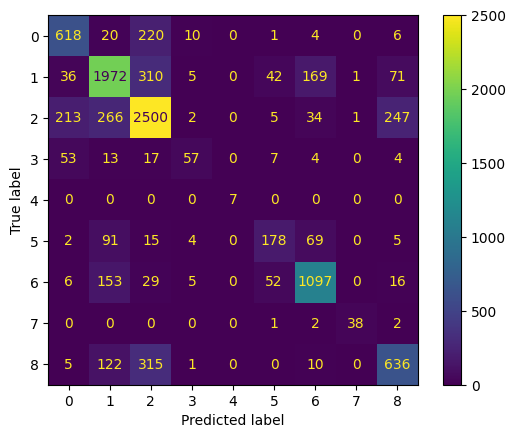

In [ ]:
rennpa_confusion_matrix(model_trained, val_ds)